 # MNIST Fashion Dataset with FastAI

 <img src='http://www.evanmarie.com/content/files/notebook_images/mnist%20_fashion.png' width=700>

In [ ]:
#@title Importing necessary libraries
%%capture
! [ -e /content ] && pip install -Uqq fastbook
!pip install nbdev
!pip install fastai

import fastbook
from fastbook import *
import fastai
from fastai.vision.widgets import *
from fastai.vision import *
import nbdev
from pathlib import Path
import PIL
from zipfile import ZipFile
from urllib.request import urlretrieve

fastbook.setup_book()

## Downloading the dataset:
In order to make this set work more smoothly with the Fast.AI framework, I have converted all of the files to actual image files and organized all of the training and validation images into the same folders and have labeled the articles of clothing with their actual labels rather than numbers. The test set is also included in the zip file I have made and hosted on my website.

In [ ]:
dataset_url = 'http://www.evanmarie.com/content/files/dataframes/fashion_mnist/fashion_mnist_images_split/fashion_mnist_images.zip'
urlretrieve(dataset_url, 'fashion_mnist_images.zip')
with ZipFile('fashion_mnist_images.zip') as f:
   f.extractall()


In [ ]:
path = Path("/content/fashion_mnist_images_training_validation")

## Creating the datablock template and dataloaders:

In [ ]:
fashion_mnist = DataBlock(               
    blocks=(ImageBlock, CategoryBlock),   # What kinds of data we are working with
    get_items=get_image_files,            # How to get the list of items
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # How to create the validation set
    get_y=parent_label,                   # How to label these items (in this case, folder name)
    item_tfms=Resize(28))                # Making all images the same size

In [ ]:
dls = fashion_mnist.dataloaders(path)

## Examples from a batch of images:

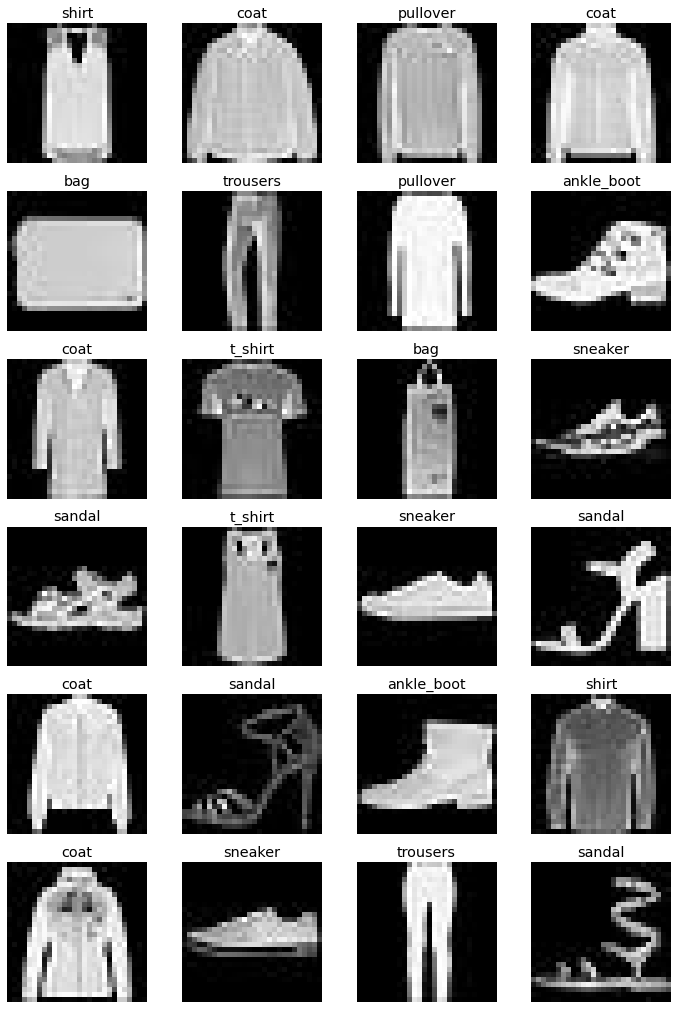

In [ ]:
dls.valid.show_batch(max_n=24, nrows=6)

## Setting up the transformation:
I am only using the augmentation on these images, since they are already size and cropped well. I am making two transformation images for each image in the set to help the model recognize the images more easily.

In [ ]:
fashion_mnist = fashion_mnist.new(
    batch_tfms=aug_transforms(mult=2))
dls = fashion_mnist.dataloaders(path)

## Training the model:
I have only trained the Resnet-18 with this set, due to the time it takes to train, even with a high level GPU. The results are quite acceptable. Although, I would like to also try with a higher level model as well.

In [ ]:
learn_fashion_mnist_resnet18 = vision_learner(dls, resnet18, metrics=accuracy)
learn_fashion_mnist_resnet18.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.272078,0.927851,0.661164,03:51


epoch,train_loss,valid_loss,accuracy,time
0,0.784995,0.576239,0.790589,07:58
1,0.657839,0.460495,0.828455,08:05
2,0.556625,0.400692,0.856620,08:05
3,0.515403,0.357876,0.865640,08:04
4,0.469586,0.342696,0.878574,08:03
5,0.454691,0.308709,0.891508,08:06
6,0.424602,0.309666,0.889125,08:05
7,0.428524,0.292714,0.894146,08:07
8,0.396722,0.276505,0.900357,08:08
9,0.374104,0.276716,0.898826,08:02


In [ ]:
learn_fashion_mnist_resnet18.export('learn_fashion_mnist_resnet18.pk1')

## Confusion Matrix: 
Most of the loss is where the model cannot seem to differentiate between pullover, coat, shirt, and t-shirt. This is quite understandable, as many of them look very much alike.

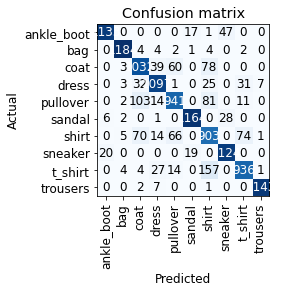

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_fashion_mnist_resnet18)
interp.plot_confusion_matrix()

## Top Losses:
Aside from the sandal that it thought was a bag, it is very clear how the model had unfortunate loss with these items. They are very hard to differentiate.

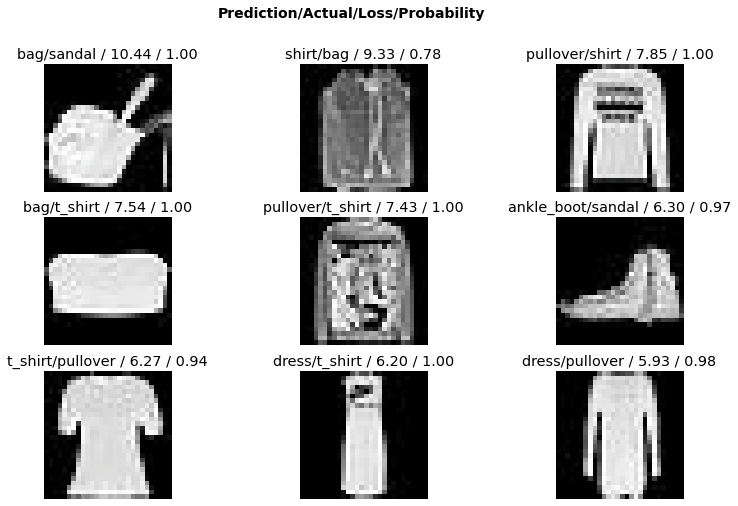

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(13,8))

## Some very accurate predictions:

coat


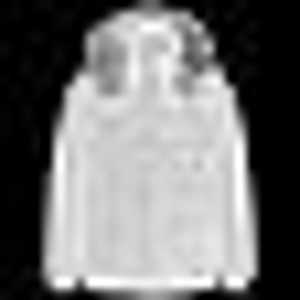

In [ ]:
prediction_01 = get_image_files(path)[23]
print(learn_fashion_mnist_resnet18.predict(prediction_01)[0])
img = PIL.Image.open(prediction_01)
newsize = (300, 300)
img = img.resize(newsize)
img

trousers


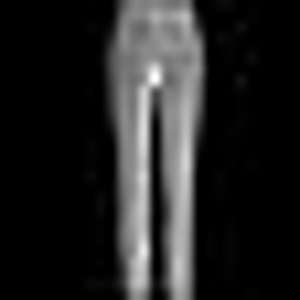

In [ ]:
prediction_02 = get_image_files(path)[9000]
print(learn_fashion_mnist_resnet18.predict(prediction_02)[0])
img = PIL.Image.open(prediction_02)
newsize = (300, 300)
img = img.resize(newsize)
img

ankle_boot


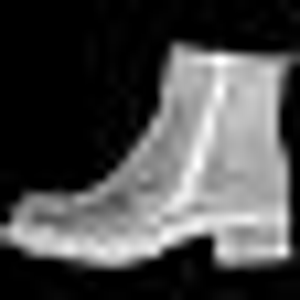

In [ ]:
prediction_03 = get_image_files(path)[33333]
print(learn_fashion_mnist_resnet18.predict(prediction_03)[0])
img = PIL.Image.open(prediction_03)
newsize = (300, 300)
img = img.resize(newsize)
img

bag


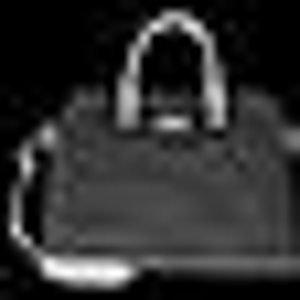

In [ ]:
prediction_04 = get_image_files(path)[44444]
print(learn_fashion_mnist_resnet18.predict(prediction_04)[0])
img = PIL.Image.open(prediction_04)
newsize = (300, 300)
img = img.resize(newsize)
img

pullover


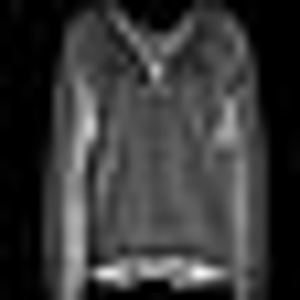

In [ ]:
prediction_05 = get_image_files(path)[55555]
print(learn_fashion_mnist_resnet18.predict(prediction_05)[0])
img = PIL.Image.open(prediction_05)
newsize = (300, 300)
img = img.resize(newsize)
img

shirt


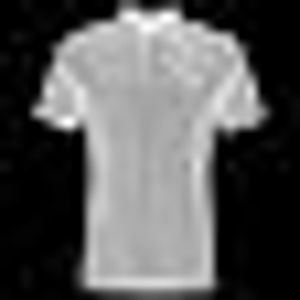

In [ ]:
prediction_06 = get_image_files(path)[22222]
print(learn_fashion_mnist_resnet18.predict(prediction_06)[0])
img = PIL.Image.open(prediction_06)
newsize = (300, 300)
img = img.resize(newsize)
img